In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traind = pd.read_csv("train.csv")

In [3]:
testd = pd.read_csv("test.csv")

In [4]:
traind.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
traind.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
testd.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training data set has both classification and numerical characteristics!

In [8]:
traind.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId has a large STD, which means it can be droped.

In [9]:
traind['Sex'] = traind['Sex'].map({'male': 0, 'female': 1})
testd['Sex'] = testd['Sex'].map({'male': 0, 'female': 1})

In [10]:
traind.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q


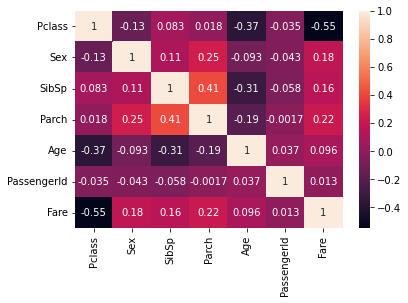

In [11]:

Pearson= sns.heatmap(traind[["Pclass","Sex","SibSp","Parch","Age","PassengerId","Fare"]].corr(method='pearson'),annot=True)
Pearson

We can see from heatmap that SibSp and Parch have a strong relationship, Pearson coefficient is 0.41, and Fare and Pclass also have a strong relationship, -0.55

In [12]:
traind.drop(['PassengerId','Ticket'],axis=1,inplace=True)

From the logic of real life and the Pearson coefficient above, it is reasonable to remove ID and Ticket

In [13]:
traind.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,NaN,Q


In [14]:
traind.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Next, we use describe() to look at the data. From the above data, we can find that SibSp, Parch ，Age and Fare all have abnormal values. The mean value is very sensitive to outliers. Compared with the mean value, there is a high probability that a row with such a large difference between the maximum value and the mean value is an outlier. So I think delete these lines.

In [15]:
print(891*0.3/100)

2.673


Generally, about 0.3% of the data points in Laishui are outliers, which is acceptable. so we use 2.6 as the critical value

In [16]:
from collections import Counter
OutlierColoumn=traind[["SibSp","Parch","Age","Fare"]]
outlier_ID=[]
for i in OutlierColoumn:
    Q1 = np.percentile(traind[i], 25, interpolation = 'midpoint')
    Q3 = np.percentile(traind[i], 75, interpolation = 'midpoint')
    IQR = Q3-Q1
    ID = traind[(traind[i] > (Q3+1.5*IQR))| (traind[i] < (Q1-1.5*IQR))].index.to_list()
    outlier_ID.extend(ID)
counts = dict(Counter(outlier_ID))
duplicates = {key:value for key, value in counts.items() if value >= 2.6}

In [17]:
print(duplicates)

{27: 3, 88: 3, 159: 3, 180: 3, 201: 3, 324: 3, 341: 3, 792: 3, 846: 3, 863: 3}


In [18]:
droplist=list(duplicates.keys())

In [19]:
droplist

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [20]:
traind.drop(droplist,axis=0, inplace=True)

In [21]:
traind.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,0.385925,2.307605,0.350738,29.731603,0.455165,0.363224,31.121566
std,0.487090,0.835055,0.477472,14.547835,0.871571,0.791839,47.996249
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [22]:
traind.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         170
SibSp         0
Parch         0
Fare          0
Cabin       680
Embarked      2
dtype: int64

In [23]:
traind.drop(['Cabin'],axis=1,inplace=True)

Text(0.5, 1.0, 'Missing values')

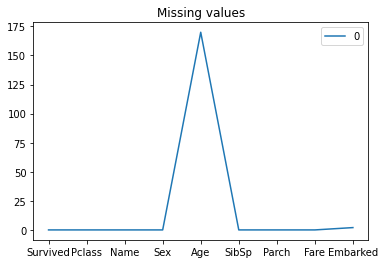

In [24]:
pd.DataFrame(traind .isnull().sum()).plot.line().set_title("Missing values")

In [25]:
import scipy
from scipy.stats import f_oneway

In [26]:
Pclass=traind.Pclass
Fare=traind.Fare

since Pclass is nearly equals to Fare, we delete Fare 

In [27]:
traind.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.25,S


In [28]:
cn = traind

In [29]:
cn.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [30]:
import re

p = cn['Name']

for key,value in p.items():
 cn['Name'][key]=str(re.findall(".*, (.+?) .*", p[key]))




 

<ipython-input-30-57aceb543251>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn['Name'][key]=str(re.findall(".*, (.+?) .*", p[key]))


In [31]:
cn.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,['Mr.'],0,22.0,1,0,7.2500,S
1,1,1,['Mrs.'],1,38.0,1,0,71.2833,C
2,1,3,['Miss.'],1,26.0,0,0,7.9250,S
3,1,1,['Mrs.'],1,35.0,1,0,53.1000,S
4,0,3,['Mr.'],0,35.0,0,0,8.0500,S


In [32]:
p = cn['Name']

In [33]:
r = cn['Age']

In [34]:
df=traind

In [35]:
type(df['Sex'])

pandas.core.series.Series

In [36]:
type(cn['Name'])

pandas.core.series.Series

In [37]:
cn['Age']= cn.groupby(['Sex','Name'])['Age'].apply(lambda row : row.fillna(row.median()))

Text(0.5, 1.0, 'Missing values')

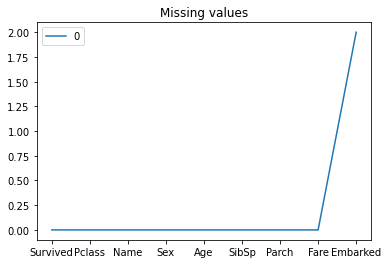

In [38]:
pd.DataFrame(cn.isnull().sum()).plot.line().set_title("Missing values")

Text(0.5, 1.0, 'Embarked')

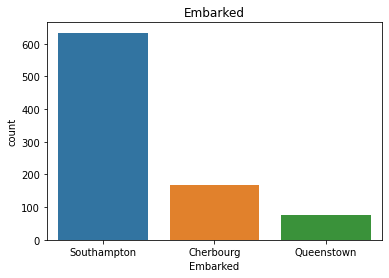

In [39]:
p = sns.countplot(x = "Embarked", data = cn)
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.set_title("Embarked")

In [40]:
cn.groupby(['Embarked']).sum()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,93,317,73,5124.92,65,61,10072.2962
Q,30,224,36,2054.50,33,13,1022.2543
S,215,1490,198,18682.25,303,246,16163.5488


In [41]:
cn['Embarked']=cn['Embarked'].fillna("S")

In [42]:
cn.groupby(['Embarked']).sum()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,93,317,73,5124.92,65,61,10072.2962
Q,30,224,36,2054.50,33,13,1022.2543
S,217,1492,200,18782.25,303,246,16323.5488


Text(0.5, 1.0, 'Missing values')

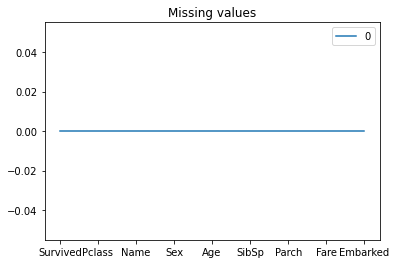

In [43]:
pd.DataFrame(cn.isnull().sum()).plot.line().set_title("Missing values")

In [44]:
traind=cn

In [45]:
traind.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,['Mr.'],0,22.0,1,0,7.2500,S
1,1,1,['Mrs.'],1,38.0,1,0,71.2833,C
2,1,3,['Miss.'],1,26.0,0,0,7.9250,S
3,1,1,['Mrs.'],1,35.0,1,0,53.1000,S
4,0,3,['Mr.'],0,35.0,0,0,8.0500,S


In [46]:
traind.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,['Mr.'],0,22.0,1,0,7.2500,S
1,1,1,['Mrs.'],1,38.0,1,0,71.2833,C
2,1,3,['Miss.'],1,26.0,0,0,7.9250,S
3,1,1,['Mrs.'],1,35.0,1,0,53.1000,S
4,0,3,['Mr.'],0,35.0,0,0,8.0500,S


In [47]:
traind.insert(6,'relative',traind['SibSp']+traind['Parch'])

In [48]:
traind.drop(['SibSp','Parch'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


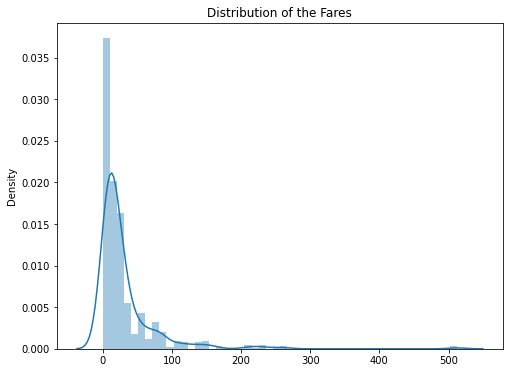

In [49]:
plt.figure(figsize=(8, 6))
sns.distplot(x=traind["Fare"])
plt.title("Distribution of the Fares")
plt.show()

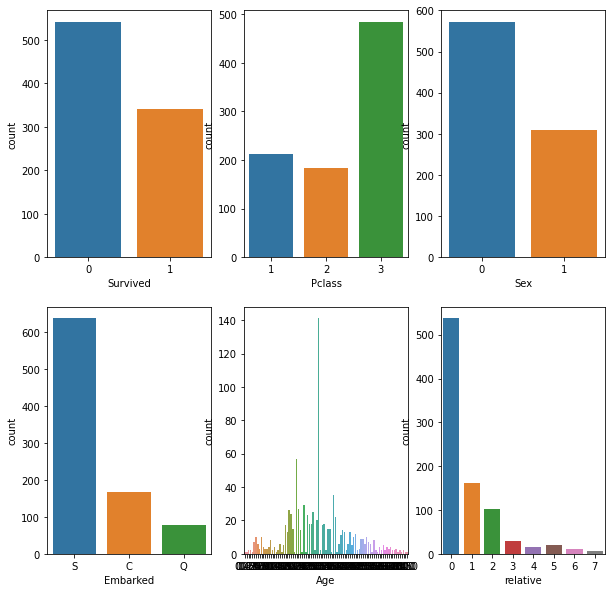

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
columns = ['Survived', 'Pclass', 'Sex', 'Embarked','Age','relative']
for i in range(len(columns)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=traind, x=columns[i])

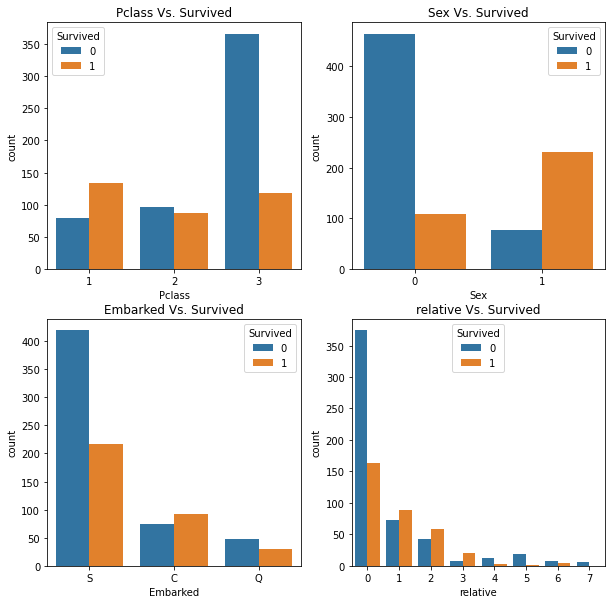

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
columns = [ 'Pclass', 'Sex', 'Embarked','relative']
for i in range(len(columns)):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=traind, x=columns[i], hue='Survived')
    plt.title(f"{columns[i]} Vs. Survived")

Next Step is cleaning and processing test dataset 

In [52]:
testd.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
testd.drop('Cabin',axis=1,inplace=True)

In [54]:
testd['Fare']= testd.groupby(['Pclass'])['Fare'].apply(lambda row : row.fillna(row.median()))


In [55]:
testd.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [56]:

p = testd['Name']

for key,value in p.items():
 testd['Name'][key]=str(re.findall(".*, (.+?) .*", p[key]))




 

<ipython-input-56-c2ac7a171403>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testd['Name'][key]=str(re.findall(".*, (.+?) .*", p[key]))


In [57]:
testd.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,['Mr.'],0,34.5,0,0,330911,7.8292,Q


In [58]:
testd['Age']= testd.groupby(['Sex','Name'])['Age'].apply(lambda row : row.fillna(row.median()))



/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [59]:
testd.groupby(['Sex','Name'])['Age'].count()

Sex  Name       
0    ['Col.']         2
     ['Dr.']          1
     ['Master.']     21
     ['Mr.']        240
     ['Rev.']         2
1    ['Dona.']        1
     ['Miss.']       78
     ['Mrs.']        72
     ['Ms.']          0
Name: Age, dtype: int64

In [60]:
testd.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [61]:
testd[testd['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
88,980,3,['Ms.'],1,NaN,0,0,364856,7.75,Q


In [62]:
Msmedian = traind[traind["Name"] =="['Ms.']"]

In [63]:
Msmedian['Age'].median()

28.0

In [64]:
testd['Age']=testd['Age'].fillna(28)



In [65]:
testd.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [66]:
traind['Embarked']=traind['Embarked'] = traind['Embarked'].map({'S': 0, 'Q': 1,'C': 2})

In [67]:
traind.head(1)

,Survived,Pclass,Name,Sex,Age,relative,Fare,Embarked
0,0,3,['Mr.'],0,22.0,1,7.25,0


Training Model

In [68]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
traind.drop_duplicates()

,Survived,Pclass,Name,Sex,Age,relative,Fare,Embarked
0,0,3,['Mr.'],0,22.0,1,7.2500,0
1,1,1,['Mrs.'],1,38.0,1,71.2833,2
2,1,3,['Miss.'],1,26.0,0,7.9250,0
3,1,1,['Mrs.'],1,35.0,1,53.1000,0
4,0,3,['Mr.'],0,35.0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,['Rev.'],0,27.0,0,13.0000,0
887,1,1,['Miss.'],1,19.0,0,30.0000,0
888,0,3,['Miss.'],1,21.0,3,23.4500,0
889,1,1,['Mr.'],0,26.0,0,30.0000,2


In [70]:
testd['Embarked']=testd['Embarked'] = testd['Embarked'].map({'S': 0, 'Q': 1,'C': 2})

In [71]:
testd.insert(6,'relative',testd['SibSp']+testd['Parch'])

In [72]:
testd.drop(['SibSp','Parch'],axis=1,inplace=True)

In [73]:
testd.drop(['Name'],axis=1,inplace=True)


In [74]:
traind.drop(['Name'],axis=1,inplace=True)

In [75]:
traind.head(1)

,Survived,Pclass,Sex,Age,relative,Fare,Embarked
0,0,3,0,22.0,1,7.25,0


In [76]:
testd.head(1)

,PassengerId,Pclass,Sex,Age,relative,Ticket,Fare,Embarked
0,892,3,0,34.5,0,330911,7.8292,1


In [77]:
x_train = traind.drop(["Survived"], axis=1).copy()
y_train = traind["Survived"] 
x_test = testd.drop(["PassengerId",'Ticket'], axis=1).copy() 


K-NN

In [78]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knn_Y_pred = knn.predict(x_test)
knn_accuracy = knn.score(x_train, y_train)
knn_accuracy

0.8297389330306469

Decision tree

In [79]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_Y_pred = decision_tree.predict(x_test)
decision_tree_accuracy = decision_tree.score(x_train, y_train)
decision_tree_accuracy

0.978433598183882

Random Forest

In [80]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
random_forest_Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
random_forest_accuracy = random_forest.score(x_train, y_train)
random_forest_accuracy

0.978433598183882

Stochastic Gradient Descent

In [81]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_Y_pred = sgd.predict(x_test)
sgd_accuracy = sgd.score(x_train, y_train)
sgd_accuracy

0.7298524404086265

Logistic Regression

In [82]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
lgp = lg.predict(x_test)
lg_accuracy = lg.score(x_train, y_train)
lg_accuracy

0.7990919409761634

In [83]:
models = pd.DataFrame({
    'Model': [ 'KNN','Stochastic Gradient Decent', 'Decision Tree','Random Forest','LogisticRegression'],
    'Score': [ knn_accuracy,sgd_accuracy, decision_tree_accuracy, random_forest_accuracy,lg_accuracy]})
models.sort_values(by='Score', ascending=False)


,Model,Score
2,Decision Tree,0.978434
3,Random Forest,0.978434
0,KNN,0.829739
4,LogisticRegression,0.799092
1,Stochastic Gradient Decent,0.729852
